In [5]:
from matplotlib.image import imread
from PIL import Image
from matplotlib import pyplot as plt

In [10]:
img = imread('screenshot.png')
img.shape

(1800, 2880, 4)

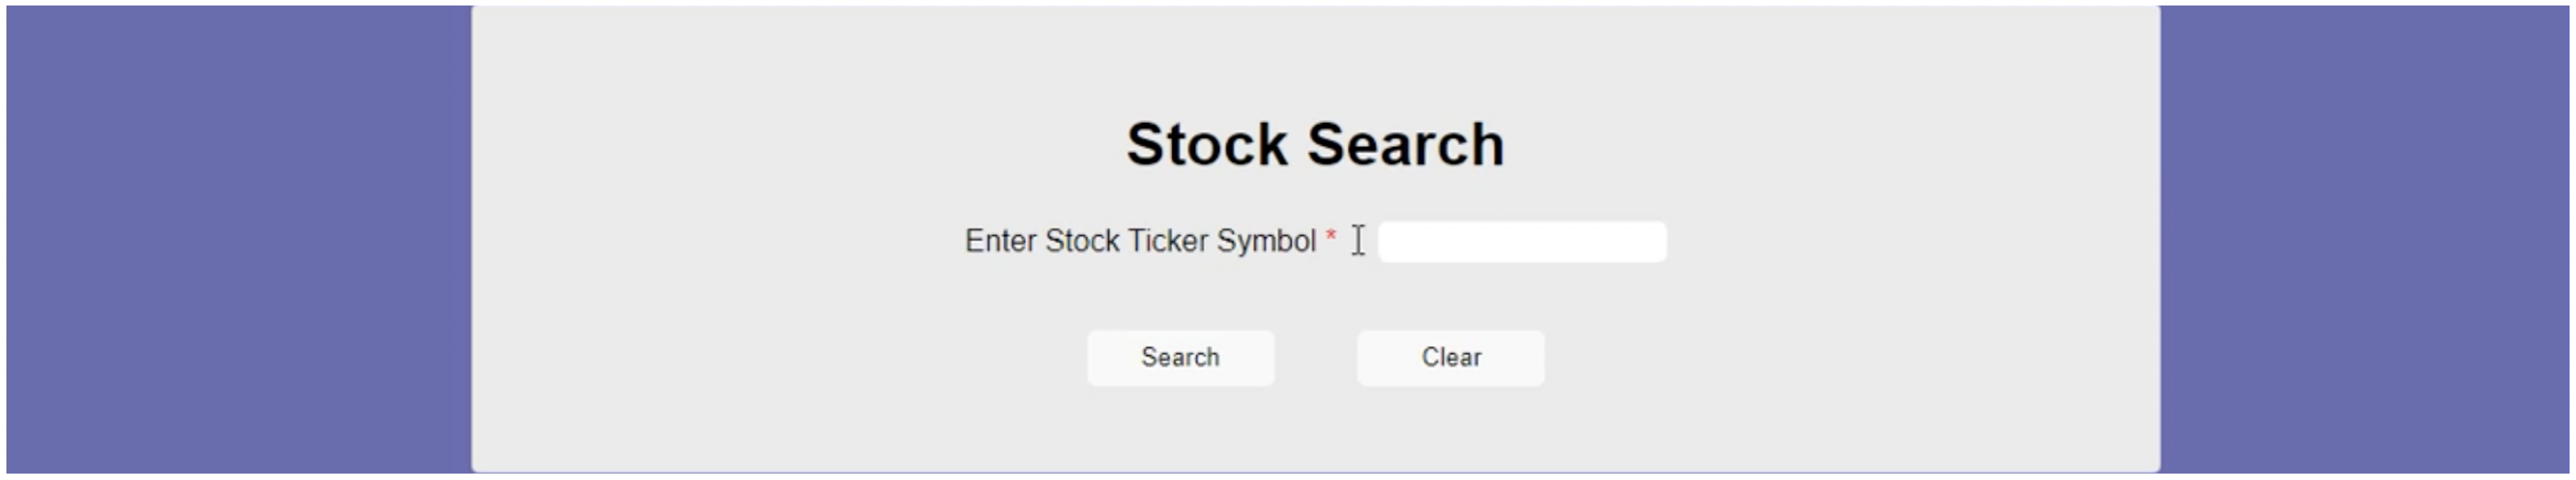

In [85]:
plt.figure(figsize=(50,50))
plt.axis('off')
plt.imshow(img[414:940,:,:])


In [84]:
940-414

526

In [75]:
2880-526-461

1893

In [76]:
1893/2880*1409

926.1239583333335

In [17]:
from newsapi import NewsApiClient
from newsapi.newsapi_exception import NewsAPIException
import json

In [3]:
newsapi = NewsApiClient(api_key='166945ff132b43c2a1a395898628ab48')

In [15]:
keyword = 'AAAP'
# all_articles = newsapi.get_everything(q=keyword,page=10)
null = None
all_articles = {"status":"ok","totalResults":3,"articles":[{"source":{"id":null,"name":"Yahoo Entertainment"},"author":"財經中心","title":"牛市行情未走完 中國A股反彈仍可期","description":"今年以來中國股市表現相對強勢，在全球市場中一枝獨秀，富邦中証500（證券代號：00783）ETF經理人楊貽甯表示，深市的表現明顯優於滬市，...","url":"https://tw.news.yahoo.com/%E7%89%9B%E5%B8%82%E8%A1%8C%E6%83%85%E6%9C%AA%E8%B5%B0%E5%AE%8C-%E4%B8%AD%E5%9C%8Ba%E8%82%A1%E5%8F%8D%E5%BD%88%E4%BB%8D%E5%8F%AF%E6%9C%9F-041210956.html","urlToImage":"https://s.yimg.com/uu/api/res/1.2/Q0A8ANbK_Sr9.dXHNR9VWA--~B/aD00MDA7dz02MDA7c209MTthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/stormmediagroup.com/c8e1f2aa595344d7167580706a0a177d","publishedAt":"2020-09-21T04:12:10Z","content":"50000783ETF10A100 0063950000783\r\n9/115006.9%25.6%41.1%19.8%AA14RSI4030\r\nAAAP\r\nA5005500\r\n1\r\n105.8%7.7%7.4%14.6%1\r\nA\r\n 1 3"},{"source":{"id":null,"name":"Habr.com"},"author":"mnv","title":"[Перевод] Текстовый индекс по котировкам в памяти на Go","description":"Недавно понадобилось реализовать поиск по началу строки, по сути WHERE name LIKE 'начало%'. Это был поиск по названию биржевых символов (AAPL, AMZN, EUR/USD и пр.). Хотелось, чтобы поиск работал быстро, и не нагружал лишний раз БД. В итоге пришел к реализации…","url":"https://habr.com/ru/post/518418/#post-content-body","urlToImage":"https://habrastorage.org/getpro/habr/upload_files/180/908/7ab/1809087ab11d44bf3f564deafebc42cd.png?v=1","publishedAt":"2020-09-09T11:09:04Z","content":", WHERE name LIKE '%'. (AAPL, AMZN, EUR/USD .). , , . , .\r\n55000 ( ). . , .\r\n . , BTree, , . , .\r\n . , .\r\n.\r\n, , . , , : \r\n<ul><li>AAA (BetaShares Australian High Interest Cash ETF, ASX), \r\n</li><li>… [+1952 chars]"},{"source":{"id":null,"name":"Nikkeibp.co.jp"},"author":"BTO","title":"アステラスが東京大学の2拠点と締結、革新的な新薬や医療ソリューションを創出へ","description":"アステラス製薬は2020年9月23日、東京大学ライフサイエンス連携研究教育拠点および東京大学センター・オブ・イノベーション「自分で守る健康社会拠点」の２つの拠点と、「Astellas Alliance Acceleration Program」（AAAP）と呼ぶ協定を締結したと発表した。アカデミアの知を生かし、革新的な新薬や医療ソリューションを創出することを目指す。","url":"https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/","urlToImage":"https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/asrellas.jpg","publishedAt":"2020-09-23T22:00:00Z","content":null}]}

In [21]:
all_articles.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [38]:
def extract_keys(article):
    if article.get('title',None) is not None:
        if article.get('url', None) is not None:
            if article.get('urlToImage', None) is not None:
                if article.get('publishedAt', None) is not None:
                    res = re.search(r'(?P<year>\d{4})-(?P<month>\d{2})-(?P<day>\d{2})', article['publishedAt']).groupdict()
                    formed_date = res['month'] + '/' + res['day'] + '/' + res['year']
                    return {'title':article['title'], 
                            'url':article['url'], 
                            'urlToImage':article['urlToImage'],
                            'publishedAt':formed_date}
    return {}

In [41]:
len(extract_keys({'title':None}))

0

In [31]:
def print_keys(article):
    print('title: ', article['title'])
    print('url: ', article['url'])
    print('urlToImage: ', article['urlToImage'])
    print('publishedAt: ', article['publishedAt'])
    print()

In [42]:
totalResults = all_articles['totalResults']
for i in range(totalResults):
    article = extract_keys(all_articles['articles'][i])
    print('article %d' % i)
    print(len(article))
    print_keys(article)

article 0
4
title:  牛市行情未走完 中國A股反彈仍可期
url:  https://tw.news.yahoo.com/%E7%89%9B%E5%B8%82%E8%A1%8C%E6%83%85%E6%9C%AA%E8%B5%B0%E5%AE%8C-%E4%B8%AD%E5%9C%8Ba%E8%82%A1%E5%8F%8D%E5%BD%88%E4%BB%8D%E5%8F%AF%E6%9C%9F-041210956.html
urlToImage:  https://s.yimg.com/uu/api/res/1.2/Q0A8ANbK_Sr9.dXHNR9VWA--~B/aD00MDA7dz02MDA7c209MTthcHBpZD15dGFjaHlvbg--/https://media.zenfs.com/en/stormmediagroup.com/c8e1f2aa595344d7167580706a0a177d
publishedAt:  09/21/2020

article 1
4
title:  [Перевод] Текстовый индекс по котировкам в памяти на Go
url:  https://habr.com/ru/post/518418/#post-content-body
urlToImage:  https://habrastorage.org/getpro/habr/upload_files/180/908/7ab/1809087ab11d44bf3f564deafebc42cd.png?v=1
publishedAt:  09/09/2020

article 2
4
title:  アステラスが東京大学の2拠点と締結、革新的な新薬や医療ソリューションを創出へ
url:  https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/
urlToImage:  https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/asrellas.jpg
publishedAt:  09/23/2020



In [27]:
all_articles['articles'][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [ ]:
#  title, url, urlToImage and publishedAt keys


In [25]:
all_articles['articles'][1]

{'source': {'id': None, 'name': 'Habr.com'},
 'author': 'mnv',
 'title': '[Перевод] Текстовый индекс по котировкам в памяти на Go',
 'description': "Недавно понадобилось реализовать поиск по началу строки, по сути WHERE name LIKE 'начало%'. Это был поиск по названию биржевых символов (AAPL, AMZN, EUR/USD и пр.). Хотелось, чтобы поиск работал быстро, и не нагружал лишний раз БД. В итоге пришел к реализации…",
 'url': 'https://habr.com/ru/post/518418/#post-content-body',
 'urlToImage': 'https://habrastorage.org/getpro/habr/upload_files/180/908/7ab/1809087ab11d44bf3f564deafebc42cd.png?v=1',
 'publishedAt': '2020-09-09T11:09:04Z',
 'content': ", WHERE name LIKE '%'. (AAPL, AMZN, EUR/USD .). , , . , .\r\n55000 ( ). . , .\r\n . , BTree, , . , .\r\n . , .\r\n.\r\n, , . , , : \r\n<ul><li>AAA (BetaShares Australian High Interest Cash ETF, ASX), \r\n</li><li>… [+1952 chars]"}

In [26]:
all_articles['articles'][2]

{'source': {'id': None, 'name': 'Nikkeibp.co.jp'},
 'author': 'BTO',
 'title': 'アステラスが東京大学の2拠点と締結、革新的な新薬や医療ソリューションを創出へ',
 'description': 'アステラス製薬は2020年9月23日、東京大学ライフサイエンス連携研究教育拠点および東京大学センター・オブ・イノベーション「自分で守る健康社会拠点」の２つの拠点と、「Astellas Alliance Acceleration Program」（AAAP）と呼ぶ協定を締結したと発表した。アカデミアの知を生かし、革新的な新薬や医療ソリューションを創出することを目指す。',
 'url': 'https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/',
 'urlToImage': 'https://bio.nikkeibp.co.jp/atcl/news/p1/20/09/23/07424/asrellas.jpg',
 'publishedAt': '2020-09-23T22:00:00Z',
 'content': None}

In [33]:
import re

In [34]:
string = '2020-09-21T04:12:10Z'
re.sub(r'(?P<year>\d{4})-(?P<month>\d{2})-(?P<day>\d{2})', 
       '\g<month>/\g<day>/\g<year>', string)

'09/21/2020T04:12:10Z'

In [35]:
res = re.search(r'(?P<year>\d{4})-(?P<month>\d{2})-(?P<day>\d{2})', string).groupdict()
form_str = res['month'] + '/' + res['day'] + '/' + res['year']


In [36]:
form_str

'09/21/2020'